In [1]:
import numpy as np

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')

Train set shape: (48000, 784), Train labels shape: (48000,)
Validation set shape: (12000, 784), Validation labels shape: (12000,)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
import pandas as pd

In [4]:
model_svm_linear = SVC(kernel='linear', random_state=42)
model_svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [5]:
import pickle

with open('model_svm_linear.pkl', 'wb') as file:
    pickle.dump(model_svm_linear, file)

In [6]:
y_val_pred_linear = model_svm_linear.predict(X_val)
val_accuracy_linear = accuracy_score(y_val, y_val_pred_linear)

In [16]:
val_accuracy_linear = accuracy_score(y_val, y_val_pred_linear)
val_precision_linear = precision_score(y_val, y_val_pred_linear, average='weighted')
val_recall_linear = recall_score(y_val, y_val_pred_linear, average='weighted')
val_f1_linear = f1_score(y_val, y_val_pred_linear, average='weighted')

print(f'Accuracy: {val_accuracy_linear:.2f}')
print(f'Precision: {val_precision_linear:.2f}')
print(f'Recall: {val_recall_linear:.2f}')
print(f'F1 Score: {val_f1_linear:.2f}')

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


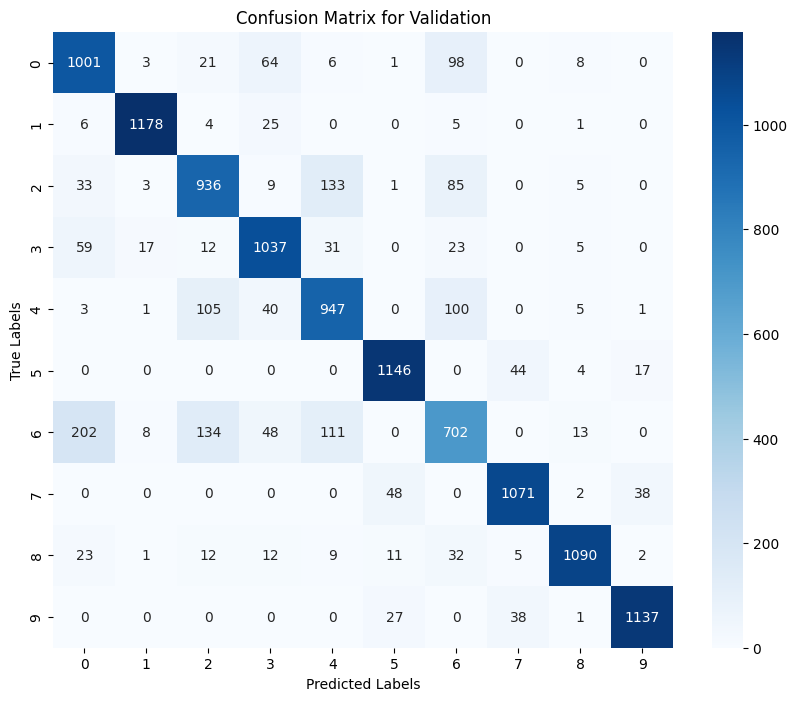

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_linear)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for Validation")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [8]:
report_df_linear = pd.DataFrame(classification_report(y_val, y_val_pred_linear, output_dict=True)).transpose()
print("\nClassification Report for Validation:")
report_df_linear


Classification Report for Validation:


,precision,recall,f1-score,support
0,0.754333,0.832779,0.791617,1202.00000
1,0.972750,0.966366,0.969547,1219.00000
2,0.764706,0.776763,0.770688,1205.00000
3,0.839676,0.875845,0.857379,1184.00000
4,0.765562,0.787854,0.776548,1202.00000
5,0.928687,0.946325,0.937423,1211.00000
6,0.671770,0.576355,0.620415,1218.00000
7,0.924870,0.924072,0.924471,1159.00000
8,0.961199,0.910610,0.935221,1197.00000
9,0.951464,0.945137,0.948290,1203.00000


In [9]:
model_svm_rbf = SVC(kernel='rbf', random_state=42)
model_svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [10]:
import pickle

with open('model_svm_rbf.pkl', 'wb') as file:
    pickle.dump(model_svm_rbf, file)

In [11]:
y_val_pred_rbf = model_svm_rbf.predict(X_val)
val_accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)


In [17]:
val_accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)
val_precision_rbf = precision_score(y_val, y_val_pred_rbf, average='weighted')
val_recall_rbf = recall_score(y_val, y_val_pred_rbf, average='weighted')
val_f1_abf = f1_score(y_val, y_val_pred_rbf, average='weighted')

print(f'Accuracy: {val_accuracy_rbf:.2f}')
print(f'Precision: {val_precision_rbf:.2f}')
print(f'Recall: {val_recall_rbf:.2f}')
print(f'F1 Score: {val_f1_abf:.2f}')

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


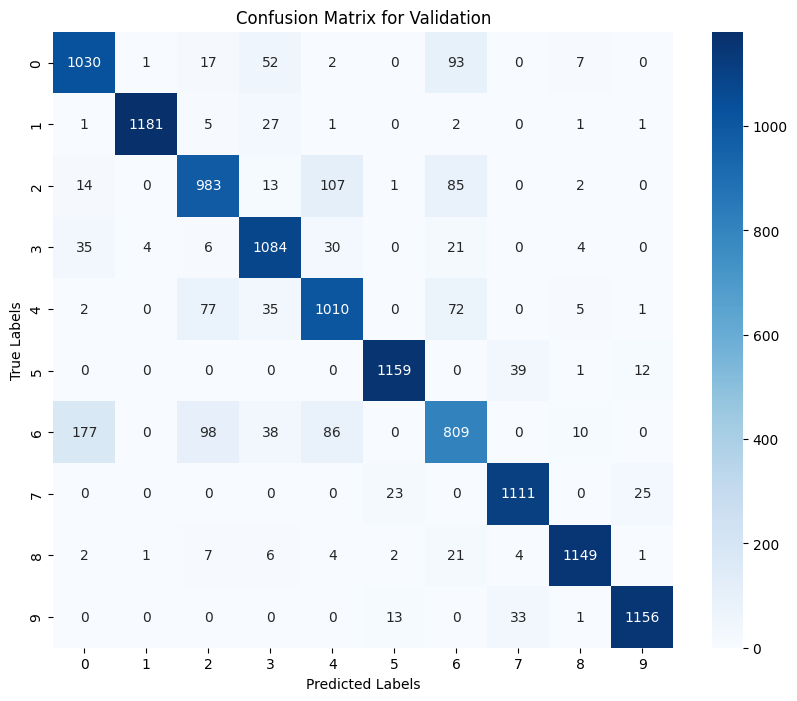

In [12]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_rbf)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for Validation")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [13]:
report_df_rbf = pd.DataFrame(classification_report(y_val, y_val_pred_rbf, output_dict=True)).transpose()
print("\nClassification Report for Validation:")
report_df_rbf


Classification Report for Validation:


,precision,recall,f1-score,support
0,0.816812,0.856905,0.836378,1202.000000
1,0.994945,0.968827,0.981712,1219.000000
2,0.823973,0.815768,0.819850,1205.000000
3,0.863745,0.915541,0.888889,1184.000000
4,0.814516,0.840266,0.827191,1202.000000
5,0.967446,0.957060,0.962225,1211.000000
6,0.733454,0.664204,0.697113,1218.000000
7,0.935973,0.958585,0.947144,1159.000000
8,0.973729,0.959900,0.966765,1197.000000
9,0.966555,0.960931,0.963735,1203.000000
